In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("CREDIT CARD USERS DATA.csv")

C:\Users\adity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for col in data.columns:  #Replacing the string #NULL! with NaN values
    data[col]=data[col].replace('#NULL!',np.nan)

In [4]:
for col in data.columns:
    print(data[col].value_counts())

6385-ZZAJYG-PJY    1
2850-PRUJVG-1Q2    1
5443-ZMHBXX-UIO    1
2681-QIEYXC-L9E    1
0856-WIQVNW-8X9    1
6675-IONUEJ-H9C    1
0335-TBOJAS-KB0    1
8662-KFTSLI-UZC    1
9569-INPBJS-4DG    1
1906-NRWEYB-E31    1
4167-DAPNVW-9C5    1
6214-XCMWPF-KII    1
7803-BRQTCG-6NW    1
7456-PTKLMX-BTI    1
1401-EKFFEL-5SJ    1
4984-UXTAXZ-EJ4    1
3957-YFDRRZ-S0R    1
9932-EAHNJR-O9V    1
8133-JPYKOC-BOA    1
4783-HWNFYV-6TH    1
5229-UOYNZP-DZY    1
8291-HWWGLV-68E    1
8838-HLCFUD-1RQ    1
5190-YTIALY-9Y8    1
5033-ZFUSQS-D1B    1
3542-NJUBBA-65D    1
3416-IWMXRH-2DM    1
0524-DGNLNI-VQM    1
9271-QHXIJE-VVI    1
5581-COVBAE-ZNK    1
                  ..
3205-RLFANE-F8N    1
4713-TIORWC-XKH    1
7712-VPSAMC-J97    1
3648-TXOABB-ZA7    1
5452-XSCDBZ-XZE    1
9285-NQRIGC-6I9    1
4215-NCRPOV-WJH    1
6982-UGFDOW-TVK    1
5110-WHLWIT-LZ9    1
9352-NVBUOA-3JM    1
1577-QPQCTM-4DS    1
0873-MIADPJ-6VP    1
0492-CDWZIZ-DTH    1
8388-GRBDWT-6P5    1
3634-FLTAJS-KXN    1
6854-MXUYYG-73P    1
3811-XQBBND-P

6.14    22
6.48    18
6.38    18
5.80    18
6.37    17
6.44    16
6.63    16
6.53    15
5.77    15
5.45    15
7.43    15
7.33    15
6.65    15
6.43    15
6.34    15
6.47    15
5.74    14
6.31    14
6.11    14
6.15    14
6.64    14
6.09    14
5.96    14
5.04    14
6.02    14
6.10    14
6.28    13
4.80    13
6.23    13
6.82    13
        ..
2.07     1
1.94     1
4.56     1
0.72     1
3.08     1
1.97     1
8.79     1
2.46     1
2.69     1
2.98     1
4.55     1
2.45     1
7.79     1
5.97     1
2.87     1
4.35     1
1.9      1
1.37     1
1.66     1
2.44     1
1.74     1
2.03     1
8.1      1
7.03     1
8.64     1
8.82     1
5.66     1
2.77     1
1.44     1
0.0      1
Name: lnlongten, Length: 1191, dtype: int64
0.0    2622
1.0    2378
Name: tollfree, dtype: int64
0.00      2622
22.75       33
18.00       33
24.00       32
23.00       31
22.00       30
23.75       30
20.00       29
19.00       29
19.50       29
17.00       28
19.75       28
20.50       27
20.25       27
17.75       27
25.00  

In [5]:
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,9662-FUSYIM-1IV,4.0,4.00,0.0,64.0,5.0,August,17.0,4.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7432-QKQFJJ-K72,2.0,5.00,1.0,52.0,5.0,July,14.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8959-RZWRHU-ST8,3.0,4.00,1.0,44.0,4.0,October,16.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9124-DZALHM-S6I,2.0,3.00,1.0,66.0,6.0,October,12.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,3512-MUWBGY-52X,2.0,2.00,0.0,47.0,4.0,July,11.0,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.columns.values

array(['custid', 'region', 'townsize', 'gender', 'age', 'agecat',
       'birthmonth', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat',
       'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat',
       'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats',
       'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype',
       'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue',
       'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat',
       'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool',
       'commutebus', 'commuterail', 'commutepublic', 'commutebike',
       'commutewalk', 'commutenonmotor', 'telecommute', 'reason',
       'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype',
       'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2',
       'card2type', 'ca

In [7]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
lnwireten,3656,73.12
lnwiremon,3656,73.12
lnequipmon,3296,65.92
lnequipten,3296,65.92
lntollten,2622,52.44
lntollmon,2622,52.44
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06


In [8]:
data.drop(['lnwireten','lnwiremon','lnequipmon','lnequipten','lntollten','lntollmon'],axis=1,inplace=True) #Removing columns with more than 50% missing values

In [9]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06
commutetime,2,0.04
cardten,2,0.04
townsize,2,0.04
lnothdebt,1,0.02
lncreddebt,1,0.02
pets_freshfish,0,0.00


In [10]:
from sklearn.preprocessing import Imputer #Imputing missing values
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(data[['lncardten']])
data['lncardten'] = imp_mean.transform(data[['lncardten']])

In [11]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(data[['lncardmon']])
data['lncardmon'] = imp_mean.transform(data[['lncardmon']])

In [12]:
data = data.dropna(how='any')
data.shape

(4994, 126)

In [13]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
response_03,0,0.0
carbuy,0,0.0
pets_small,0,0.0
pets_saltfish,0,0.0
pets_freshfish,0,0.0
homeown,0,0.0
hometype,0,0.0
address,0,0.0
addresscat,0,0.0
cars,0,0.0


In [14]:
data.index=data.custid

In [15]:
target_variable=data['cardspent']+data['card2spent'] #Extracting our target variable

#### Exploratory Data Analysis

Text(0,0.5,'Credit spent on both cards')

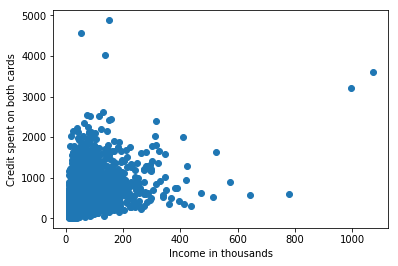

In [16]:
plt.scatter(data['income'],target_variable)
plt.xlabel('Income in thousands')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

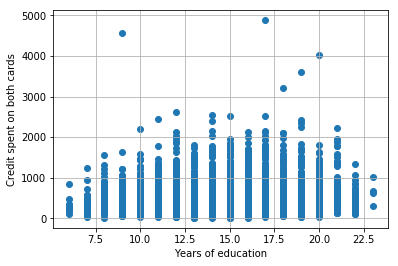

In [17]:
plt.scatter(data['ed'],target_variable)
plt.grid()
plt.xlabel('Years of education')
plt.ylabel('Credit spent on both cards')

In [18]:
data['jobcat'].value_counts()


2.0    1638
1.0    1388
6.0     686
3.0     619
5.0     451
4.0     212
Name: jobcat, dtype: int64

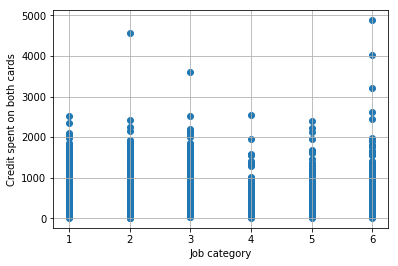

In [19]:
plt.grid()
plt.xlabel('Job category')
plt.ylabel('Credit spent on both cards')
plt.scatter(data['jobcat'],target_variable)

Text(0,0.5,'Credit spent on both cards')

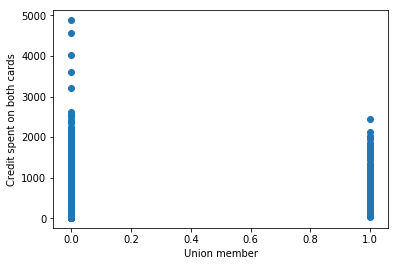

In [20]:
plt.scatter(data['union'],target_variable)
plt.xlabel('Union member')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

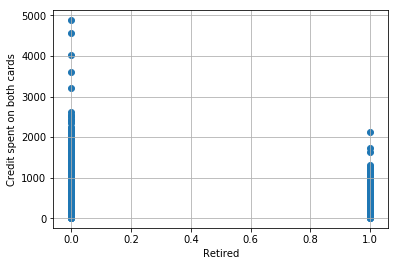

In [21]:
plt.grid()
plt.scatter(data['retire'],target_variable)
plt.xlabel('Retired')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

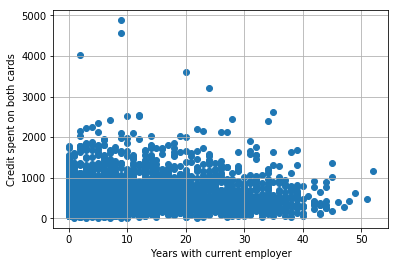

In [22]:
plt.grid()
plt.scatter(data['employ'],target_variable)
plt.xlabel('Years with current employer')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

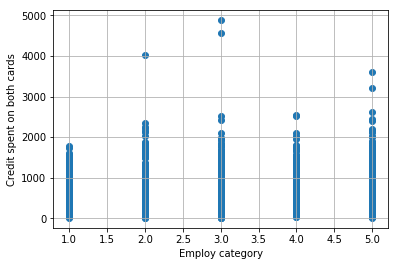

In [23]:
plt.grid()
plt.scatter(data['empcat'],target_variable)
plt.xlabel('Employ category')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

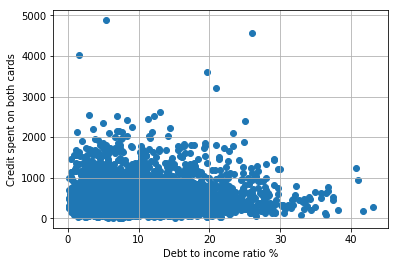

In [24]:
plt.grid()
plt.scatter(data['debtinc'],target_variable)
plt.xlabel('Debt to income ratio %')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

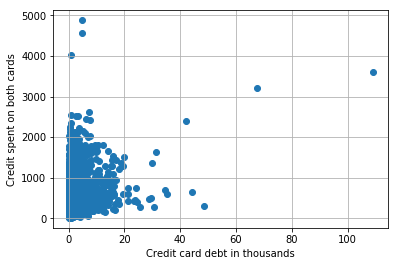

In [25]:
plt.grid()
plt.scatter(data['creddebt'],target_variable)
plt.xlabel('Credit card debt in thousands')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

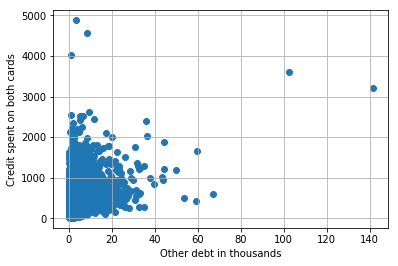

In [26]:
plt.grid()
plt.scatter(data['othdebt'],target_variable)
plt.xlabel('Other debt in thousands')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

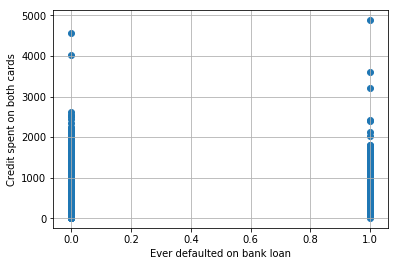

In [27]:
plt.grid()
plt.scatter(data['default'],target_variable)
plt.xlabel('Ever defaulted on bank loan')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

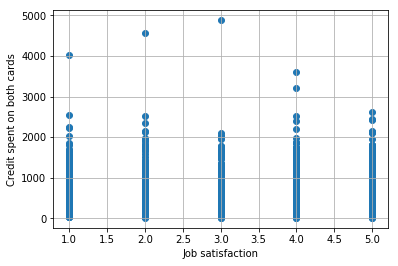

In [28]:
plt.grid()
plt.scatter(data['jobsat'],target_variable)
plt.xlabel('Job satisfaction')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

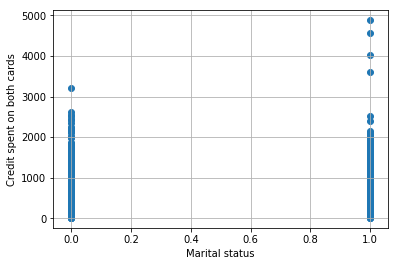

In [29]:
plt.grid()
plt.scatter(data['marital'],target_variable)
plt.xlabel('Marital status')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

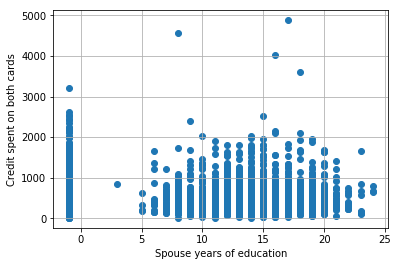

In [30]:
plt.grid()
plt.scatter(data['spoused'],target_variable)
plt.xlabel('Spouse years of education')
plt.ylabel('Credit spent on both cards')

In [31]:
data['spoused'].value_counts()

-1.0     2596
 13.0     270
 14.0     267
 15.0     257
 12.0     250
 16.0     250
 11.0     233
 17.0     188
 10.0     141
 18.0     116
 9.0      106
 19.0      90
 8.0       70
 20.0      59
 7.0       36
 21.0      20
 6.0       14
 22.0      14
 23.0       9
 5.0        4
 24.0       3
 3.0        1
Name: spoused, dtype: int64

Text(0,0.5,'Credit spent on both cards')

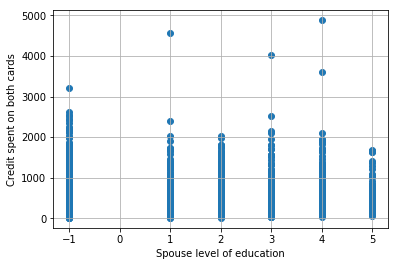

In [32]:
plt.grid()
plt.scatter(data['spousedcat'],target_variable)
plt.xlabel('Spouse level of education')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

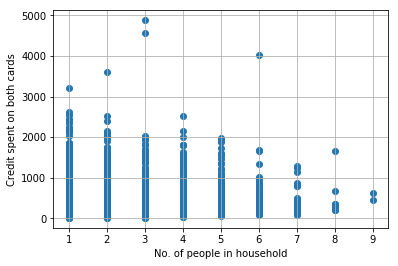

In [33]:
plt.grid()
plt.scatter(data['reside'],target_variable)
plt.xlabel('No. of people in household')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

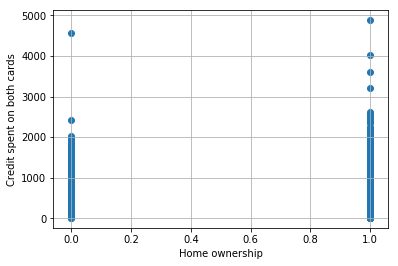

In [34]:
plt.grid()
plt.scatter(data['homeown'],target_variable)
plt.xlabel('Home ownership')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

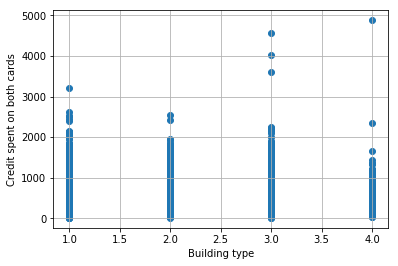

In [35]:
plt.grid()
plt.scatter(data['hometype'],target_variable)
plt.xlabel('Building type')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

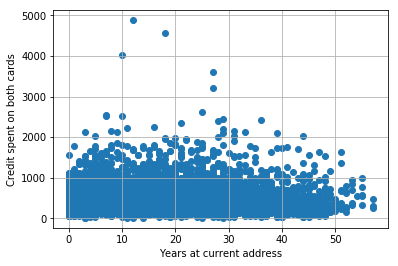

In [36]:
plt.grid()
plt.scatter(data['address'],target_variable)
plt.xlabel('Years at current address')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

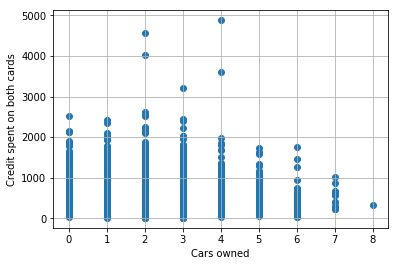

In [37]:
plt.grid()
plt.scatter(data['cars'],target_variable)
plt.xlabel('Cars owned')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

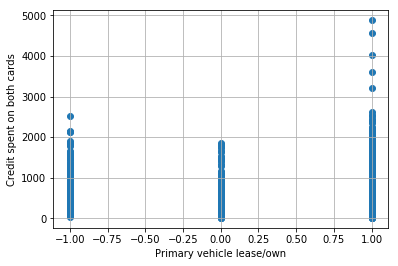

In [38]:
plt.grid()
plt.scatter(data['carown'],target_variable)
plt.xlabel('Primary vehicle lease/own')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

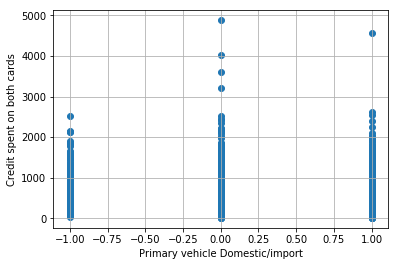

In [39]:
plt.grid()
plt.scatter(data['cartype'],target_variable)
plt.xlabel('Primary vehicle Domestic/import')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

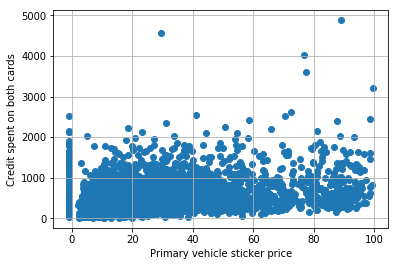

In [40]:
plt.grid()
plt.scatter(data['carvalue'],target_variable)
plt.xlabel('Primary vehicle sticker price')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

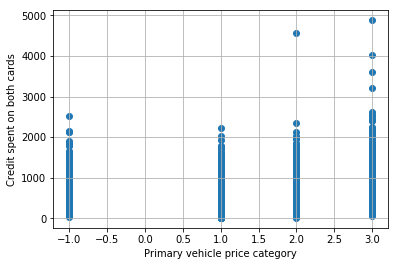

In [41]:
plt.grid()
plt.scatter(data['carcatvalue'],target_variable)
plt.xlabel('Primary vehicle price category')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

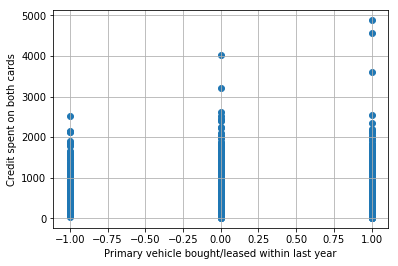

In [42]:
plt.grid()
plt.scatter(data['carbought'],target_variable)
plt.xlabel('Primary vehicle bought/leased within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

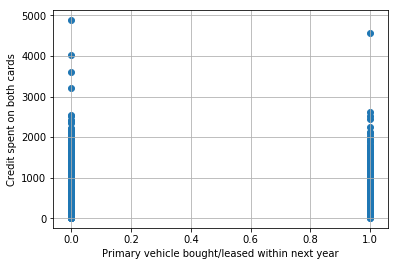

In [43]:
plt.grid()
plt.scatter(data['carbuy'],target_variable)
plt.xlabel('Primary vehicle bought/leased within next year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

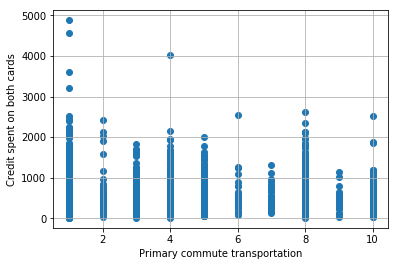

In [44]:
plt.grid()
plt.scatter(data['commute'],target_variable)
plt.xlabel('Primary commute transportation')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

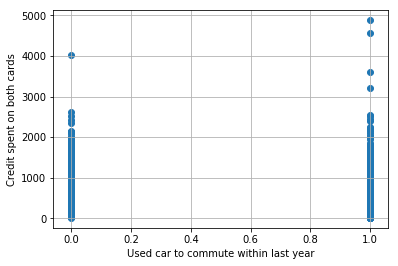

In [45]:
plt.grid()
plt.scatter(data['commutecar'],target_variable)
plt.xlabel('Used car to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

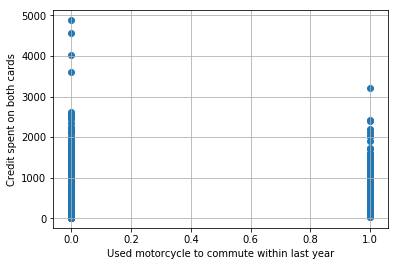

In [46]:
plt.grid()
plt.scatter(data['commutemotorcycle'],target_variable)
plt.xlabel('Used motorcycle to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

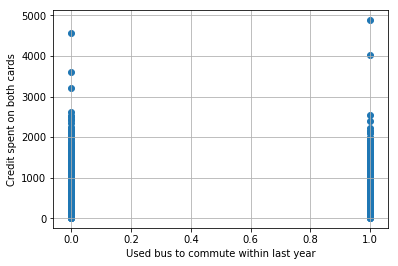

In [47]:
plt.grid()
plt.scatter(data['commutebus'],target_variable)
plt.xlabel('Used bus to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

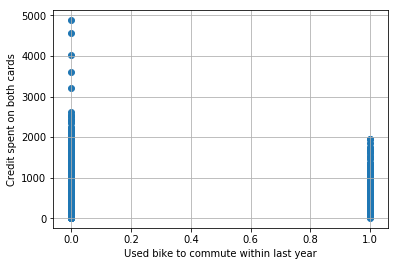

In [48]:
plt.grid()
plt.scatter(data['commutebike'],target_variable)
plt.xlabel('Used bike to commute within last year')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

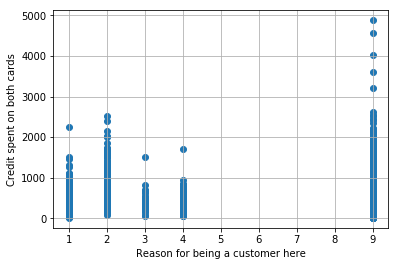

In [49]:
plt.grid()
plt.scatter(data['reason'],target_variable)
plt.xlabel('Reason for being a customer here')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

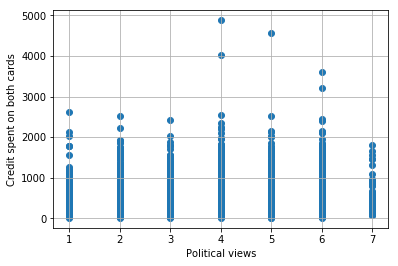

In [50]:
plt.grid()
plt.scatter(data['polview'],target_variable)
plt.xlabel('Political views')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

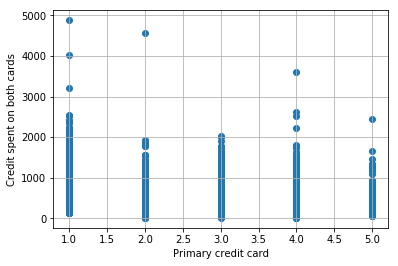

In [51]:
plt.grid()
plt.scatter(data['card'],target_variable)
plt.xlabel('Primary credit card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

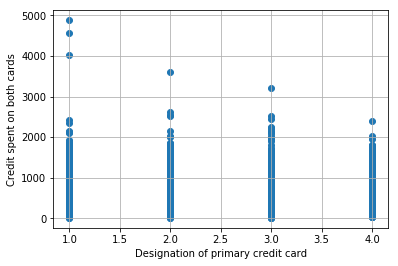

In [52]:
plt.grid()
plt.scatter(data['cardtype'],target_variable)
plt.xlabel('Designation of primary credit card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

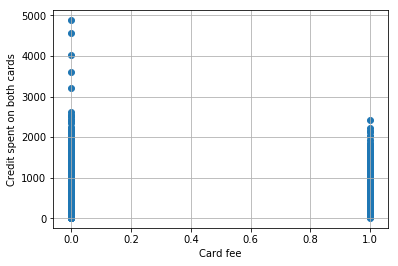

In [53]:
plt.grid()
plt.scatter(data['cardfee'],target_variable)
plt.xlabel('Card fee')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

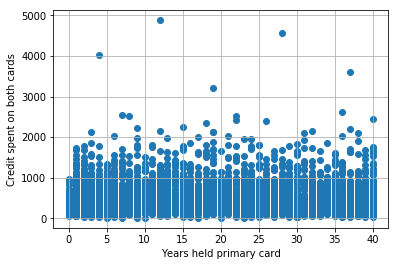

In [54]:
plt.grid()
plt.scatter(data['cardtenure'],target_variable)
plt.xlabel('Years held primary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

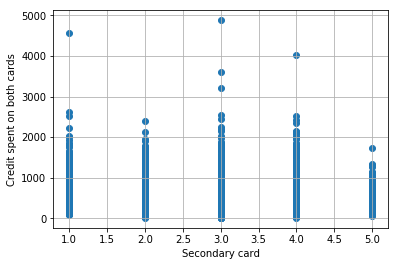

In [55]:
plt.grid()
plt.scatter(data['card2'],target_variable)
plt.xlabel('Secondary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

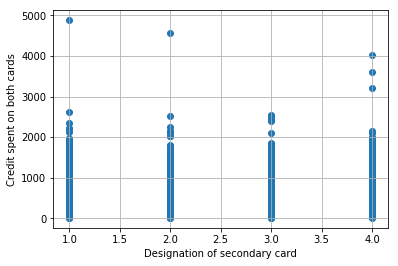

In [56]:
plt.grid()
plt.scatter(data['card2type'],target_variable)
plt.xlabel('Designation of secondary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

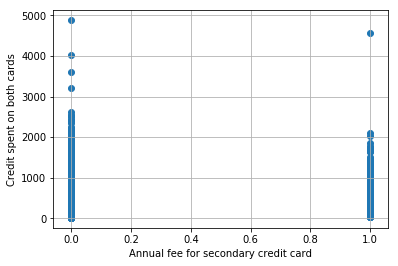

In [57]:
plt.grid()
plt.scatter(data['card2fee'],target_variable)
plt.xlabel('Annual fee for secondary credit card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

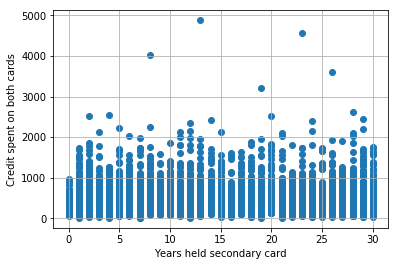

In [58]:
plt.grid()
plt.scatter(data['card2tenure'],target_variable)
plt.xlabel('Years held secondary card')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

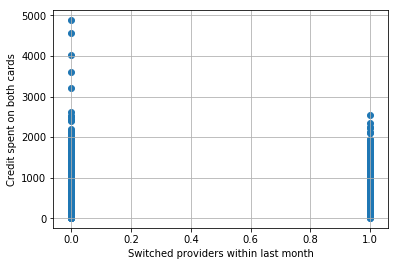

In [59]:
plt.grid()
plt.scatter(data['churn'],target_variable)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

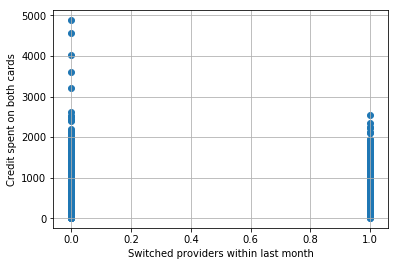

In [60]:
plt.grid()
plt.scatter(data['churn'],target_variable)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

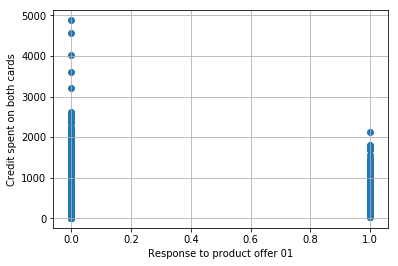

In [61]:
plt.grid()
plt.scatter(data['response_01'],target_variable)
plt.xlabel('Response to product offer 01')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

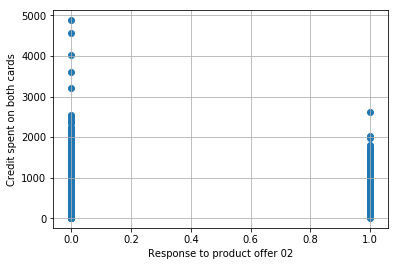

In [62]:
plt.grid()
plt.scatter(data['response_02'],target_variable)
plt.xlabel('Response to product offer 02')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

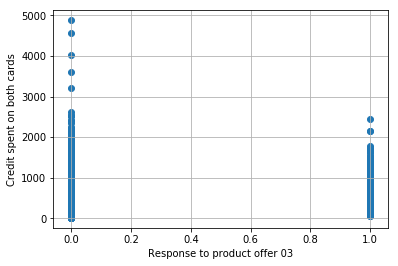

In [63]:
plt.grid()
plt.scatter(data['response_03'],target_variable)
plt.xlabel('Response to product offer 03')
plt.ylabel('Credit spent on both cards')

Text(0,0.5,'Credit spent on both cards')

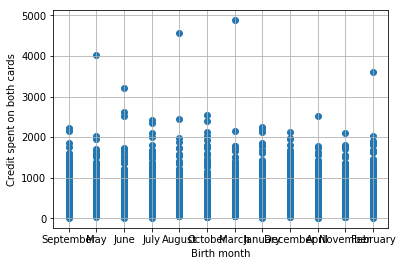

In [64]:
plt.grid()
plt.scatter(data['birthmonth'],target_variable)
plt.xlabel('Birth month')
plt.ylabel('Credit spent on both cards')

In [16]:
data.drop(['cardspent','card2spent'],axis=1,inplace=True)

C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
data.drop('custid',axis=1,inplace=True)

C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
data.drop('birthmonth',axis=1,inplace=True)

C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data.shape

(4994, 122)

#### Predictive Modelling Phase

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data,target_variable,test_size=0.2,random_state=0)

C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [58]:
# Recursive Feature Elimination


# create a base classifier used to evaluate a subset of attributes
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)
X, y = X_train, y_train
# create the RFE model and select 40 attributes
rfe = RFE(model, n_features_to_select=40)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False  True False False False  True False False
  True  True False  True  True  True  True  True False False False  True
 False False  True False False False False False False False False  True
  True False  True False False  True False False False False False  True
 False False False False False False False False False False False  True
 False False False  True False False False  True False  True False  True
 False  True False  True  True False False  True False  True  True  True
 False False  True  True False  True  True False  True  True  True  True
 False False  True False False False False False False False False False
 False  True False False False False False False False False False False
 False False]
[ 1  7 28  1 48  1 17  6 38  1 46 80  1  1 39  1  1  1  1  1 50 11 72  1
 24  9  1  5  4 19 29 36 82 15 35  1  1 21  1 54 25  1 69 22 31  2 26  1
 64 34 55 27 40 52 65 32 79 56 20  1 53 23 43  1 12  8 51  1 60  1 10  1
 49  1 70  1  1 30 16  1 37  1  1  1 

In [59]:
features=(rfe.support_).tolist()
tot_features=data.columns
indices=list()
for i in range(len(features)):
    if features[i]==True:
        indices.append(i)
tot_features[indices]

Index(['region', 'age', 'ed', 'employ', 'income', 'lninc', 'debtinc',
       'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'pets',
       'hometype', 'address', 'cars', 'carvalue', 'commutetime', 'polview',
       'card', 'cardtenure', 'card2', 'card2benefit', 'card2tenure',
       'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten',
       'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon', 'lncardmon',
       'cardten', 'lncardten', 'wireten', 'hourstv'],
      dtype='object')

In [60]:
y_pred=rfe.predict(X_test)

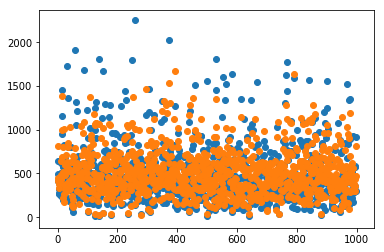

In [61]:
plt.scatter(range(len(y_pred)),y_test)
plt.scatter(range(len(y_pred)),y_pred)

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

50815.724783570215

In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rfe,X,y,scoring="mean_squared_error",cv=5)
scores.mean()

C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\161262\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in versi

-71101.20394426826

In [63]:
y_pred=pd.DataFrame(data=y_pred,index=X_test.index)

In [64]:
y_pred.to_csv('Results.csv')

In [65]:
important_features=pd.DataFrame(tot_features[indices],index=range(len(tot_features[indices])))

In [67]:
important_features.to_csv('Imp features.csv')

### i-i-i-i-i--i-i-i-i--------------------------------------------------------------

### Insights and Observations from the data
* Given a high dimensional data, variables which seemed to be important for credit card card spend were analysed.
* People with rather high income did not have large expenditure on credit card except a few outliers.
* People with 13-14 years of education were found to be spending more on their credit cards as compared to those with less or rather many years of education.
* Job category did not really affect the spending of customers, except a few outliers in category 6.
* Customers who were not union members were found to be spending slightly more than those who were members.
* Customers who were retired tend to spend less on their credit cards.
* Credit spent on cards seemed to be decreasing with increase in number of years of service with the same employer.
* Customers with high Debt to income ratio(%) spent way less on their credit cards as compared to those with low Debt to income ratio.
* Customers with low credit card debt spent more as compared to those with high debt. But not many customers had a very high debt except a few outliers.
* Marital status of customers did not really affect the spend on credit cards except a few outliers.
* Customers with less number of people in household tend to spend more particularly customers who were alone.
* Political views had a neutral affect on credit card spend barring highly conserative people who were found to be spending slighly less than others.
* Customers who were not being charged a card fee were found to be spending more.
* Customers who did not receive any of the 3 product offers were found to be spending more as compared to those who received offers.